# TOMI INDEX

Para realizar a interpolação do TOMI Index, insira abaixo o caminho do arquivo xlsx, xls, ou csv.

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import openpyxl

plt.style.use(["bmh"])

file_name = "./tests/@CN_OGX-49.xlsx"

dataframe = pd.read_excel(
                file_name,
                skiprows=0,
                decimal=",",
                sheet_name="TUDO",
            )

dataframe

,Profundidade,TVDSS,TN%,d15N,TOC%,d13C,TOC/TN,TS%,TC%,TIC%
0,1665,-1551,0.023717,NaN,0.674199,-27.204858,28.426833,0.243,1.06,0.385801
1,1674,-1560,0.049761,-1.999375,1.138534,-26.903999,22.880187,0.230,1.20,0.061466
2,1677,-1563,0.041436,NaN,1.014081,-27.134068,24.473313,0.329,2.43,1.415919
3,1680,-1566,0.056889,0.514699,0.612316,-25.406586,10.763327,0.259,1.22,0.607684
4,1683,-1569,0.022852,NaN,0.459156,-26.144969,20.092525,0.364,1.33,0.870844
5,1686,-1572,0.044987,-0.778253,0.770819,-26.520551,17.134109,0.267,1.66,0.889181
6,1689,-1575,0.042003,NaN,0.576998,-25.773319,13.736999,0.322,1.44,0.863002
7,1692,-1578,0.070471,-0.656849,1.032965,-26.360290,14.657972,0.577,1.30,0.267035
8,1695,-1581,0.080638,1.091368,0.990373,-25.904085,12.281701,0.287,1.30,0.309627
9,1698,-1584,0.096140,1.539552,1.388665,-26.490072,14.444255,0.410,1.48,0.091335


In [25]:
print(np.min(dataframe["d15N"]))
print(np.max(dataframe["d15N"]))

-2.2958031
1.5395516


In [29]:
art_d15n = np.linspace(
    np.min(dataframe["d15N"]),
    np.max(dataframe["d15N"]),
    12
)
for i in art_d15n:
    print(int(i))

-2
-1
-1
-1
0
0
0
0
0
0
1
1


In [34]:
import numpy as np
from pykrige.ok import OrdinaryKriging
import matplotlib.pyplot as plt

# Dados dos pontos-chave de probabilidade ARTIGO
TOC_TN_ARTIGO = np.array(
    [4, 4, 4, 4, 10, 10, 10, 10, 100, 100, 100, 100]
)  # Lista/array dos valores de TOC:TN dos pontos-chave
C13CORG_ARTIGO = np.array(
    [-10, -22, -25, -34, -10, -22, -25, -34, -10, -22, -25, -34]
)  # Lista/array dos valores de δ13Corg dos pontos-chave
PROBABILIDADE = np.array(
    [0, 10, 20, 30, 20, 30, 40, 50, 90, 95, 98, 100]
)  # Lista/array dos valores de probabilidade dos pontos-chave

# Dados das suas amostras
amostra_art_toc_tn = dataframe["TOC/TN"]  # Lista/array dos valores de TOC:TN das suas amostras
amostra_art_c13corg = dataframe["d13C"]  # Lista/array dos valores de δ13Corg das suas amostras

# Grade de valores para interpolação
art_toc_tn_grid = np.linspace(0, 100, 1001)  # Valores de TOC:TN para a grade
art_c13corg_grid = np.linspace(-34, -10, 241)  # Valores de δ13Corg para a grade

# Kriging
OK = OrdinaryKriging(
    TOC_TN_ARTIGO,
    C13CORG_ARTIGO,
    PROBABILIDADE,
    variogram_model="gaussian",
)
z, ss = OK.execute("grid", art_toc_tn_grid, art_c13corg_grid)

# Aplicação dos dados das suas amostras na grade interpolada
amostra_probabilidade, ss = OK.execute(
    "points", amostra_art_toc_tn, amostra_art_c13corg
)

print(np.shape(z))
print(np.shape(amostra_probabilidade))

(241, 1001)
(32,)


In [35]:
import numpy as np
from pykrige.ok import OrdinaryKriging
import matplotlib.pyplot as plt

# Dados dos pontos-chave de probabilidade do
art_toc_tn = np.array(
    [4, 4, 4, 4, 10, 10, 10, 10, 100, 100, 100, 100]
)  # Lista/array dos valores de TOC:TN dos pontos-chave
art_c13corg = np.array(
    [-10, -22, -25, -34, -10, -22, -25, -34, -10, -22, -25, -34]
)  # Lista/array dos valores de δ13Corg dos pontos-chave
art_d15n_empirico = np.array(
    [-2, -1, -1, -1, 0, 0, 0, 0, 0, 0, 1, 1]
)
amostra_probabilidade = amostra_probabilidade

# Dados das suas amostras
amostra_art_toc_tn = dataframe["TOC/TN"]  # Lista/array dos valores de TOC:TN das suas amostras
amostra_art_c13corg = dataframe["d13C"]  # Lista/array dos valores de δ13Corg das suas amostras
amostra_art_d15n = dataframe["d15N"]

# Grade de valores para interpolação
art_toc_tn_grid = np.linspace(0, 100, 1001)  # Valores de TOC:TN para a grade
art_d15n_grid = np.linspace(-2, 1, 241)  # Valores de δ13Corg para a grade

# Kriging
OK = OrdinaryKriging(
    art_toc_tn,
    art_d15n_empirico,
    amostra_probabilidade,
    variogram_model="gaussian",
)
z, ss = OK.execute("grid", art_toc_tn_grid, art_d15n_grid)

# Aplicação dos dados das suas amostras na grade interpolada
amostra_probabilidade_15n, ss = OK.execute(
    "points", amostra_art_toc_tn, amostra_art_d15n
)

print(np.shape(z))
print(np.shape(amostra_probabilidade_15n))

IndexError: boolean index did not match indexed array along axis 0; size of axis is 496 but size of corresponding boolean axis is 66

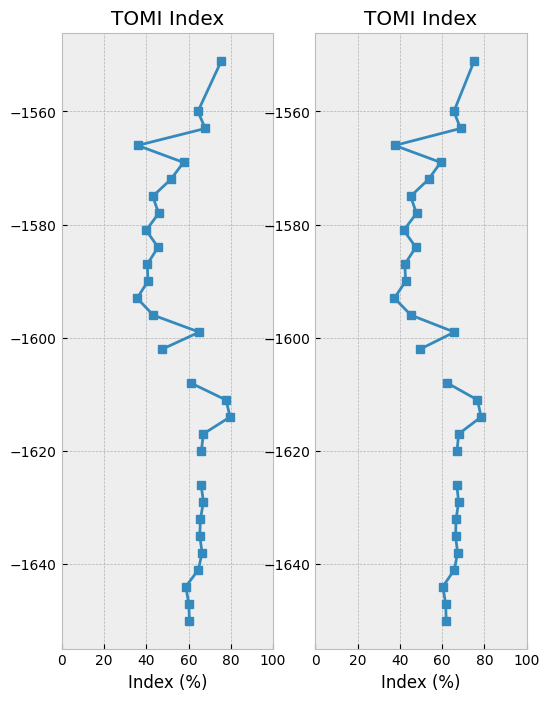

In [17]:
plt.figure(figsize=(6, 8))

plt.subplot(121)
plt.plot(amostra_probabilidade, dataframe["TVDSS"], "s-", label="TOMI")

# plt.gca().invert_yaxis()
plt.xlim(0, 100)
plt.title("TOMI Index")
plt.xlabel("Index (%)")

plt.subplot(122)
plt.plot(amostra_probabilidade2, dataframe["TVDSS"], "s-", label="TOMI")
plt.xlim(0, 100)
plt.title("TOMI Index")
plt.xlabel("Index (%)")


plt.show()

In [19]:
amostra_probabilidade

masked_array(data=[75.57435364282061, 64.4105297686281, 67.91537637607487,
                   35.88711431459175, 57.61432880882021,
                   51.59455868858744, 43.047901784064244,
                   45.86784157067139, 39.941178881959665,
                   45.5540399156641, 40.46809691053433, 40.79891632692358,
                   35.66021386949981, 43.27042319965769,
                   65.06396256669643, 47.63710513633806, nan,
                   61.08011933819425, 77.71956734852078,
                   79.66876292595448, 66.98889998374945,
                   66.06151132335268, nan, 65.90723737364773,
                   67.04625342489526, 65.63214794335667,
                   65.29566050393834, 66.39101616493058,
                   64.66726435737657, 58.690240950559584,
                   60.117595955340256, 60.430070824839255],
             mask=[False, False, False, False, False, False, False, False,
                   False, False, False, False, False, False, False, False,


In [22]:
import pandas as pd

fmane2 = "./uploads/@CN_OGX-49.xlsx"

longa = pd.read_excel(fmane2, skiprows=0, sheet_name="TUDO")

longa.iloc[:, 0]

0     1665
1     1674
2     1677
3     1680
4     1683
5     1686
6     1689
7     1692
8     1695
9     1698
10    1701
11    1704
12    1707
13    1710
14    1713
15    1716
16    1719
17    1722
18    1725
19    1728
20    1731
21    1734
22    1737
23    1740
24    1743
25    1746
26    1749
27    1752
28    1755
29    1758
30    1761
31    1764
Name: Profundidade, dtype: int64